In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
DATA_DIR = Path('../data')
df = pd.read_csv(DATA_DIR/'accidents.csv')
df.describe()
import sys
sys.path.append('..')
from src.data import load_data, convert_to_bool


In [26]:
cars_df = load_data('ToyotaCorolla', index_col='Id')
cars_df.drop(columns='Model',inplace=True)
X = cars_df.drop(columns='Price')
y = cars_df['Price']
cars_df

/workspaces/AdvPythonML/data/ToyotaCorolla.csv


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,13500,23,10,2002,46986,Diesel,90,1,Blue,0,...,1,1,0,0,0,1,0,0,0,0
2,13750,23,10,2002,72937,Diesel,90,1,Silver,0,...,0,1,0,0,0,1,0,0,0,0
3,13950,24,9,2002,41711,Diesel,90,1,Blue,0,...,0,1,0,0,0,1,0,0,0,0
4,14950,26,7,2002,48000,Diesel,90,0,Black,0,...,0,1,0,0,0,1,0,0,0,0
5,13750,30,3,2002,38500,Diesel,90,0,Black,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,7500,69,12,1998,20544,Petrol,86,1,Blue,0,...,1,1,0,1,1,1,0,0,0,0
1439,10845,72,9,1998,19000,Petrol,86,0,Grey,0,...,0,1,0,0,1,1,0,0,0,0
1440,8500,71,10,1998,17016,Petrol,86,0,Blue,0,...,0,1,0,0,0,1,0,0,0,0


In [49]:
cars_df = convert_to_bool(cars_df,['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'])

In [50]:
cars_df.dtypes

Price                  int64
Age_08_04              int64
Mfg_Month              int64
Mfg_Year               int64
KM                     int64
Fuel_Type             object
HP                     int64
Met_Color            boolean
Color                 object
Automatic            boolean
CC                     int64
Doors                  int64
Cylinders              int64
Gears                  int64
Quarterly_Tax          int64
Weight                 int64
Mfr_Guarantee        boolean
BOVAG_Guarantee      boolean
Guarantee_Period       int64
ABS                  boolean
Airbag_1             boolean
Airbag_2             boolean
Airco                boolean
Automatic_airco      boolean
Boardcomputer        boolean
CD_Player            boolean
Central_Lock         boolean
Powered_Windows      boolean
Power_Steering       boolean
Radio                boolean
Mistlamps            boolean
Sport_Model          boolean
Backseat_Divider     boolean
Metallic_Rim         boolean
Radio_cassette

In [48]:
#Just a little piece of code to get the boolean columns - ignore
df = pd.DataFrame(cars_df.max()==1, columns=['IsBool'])   
df[df.IsBool].index

Index(['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [28]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from src.feature_selection import FeatureImportance


<AxesSubplot:>

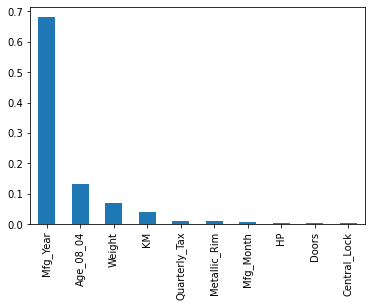

In [59]:
dtr = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
cat_col = X_train.select_dtypes(exclude='number').columns
bool_cols = X_train.select_dtypes(include='bool').columns
num_cols = X_train.select_dtypes(include=np.number).columns

pre_processing = ColumnTransformer([('cat_encoder', OneHotEncoder(), cat_col),('num_encoder', StandardScaler(),num_cols)])

pipe = Pipeline([("pp",pre_processing), ("dtr",dtr)])
pipe.fit(X_train,y_train)
fi= FeatureImportance(pipe)
fi.get_feature_names()
fi.get_feature_importance().sort_values(ascending=False)[:10].plot(kind='bar')

In [35]:
pipe['pp']

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_encoder', OneHotEncoder(),
                                 Index(['Fuel_Type', 'Color'], dtype='object'))])

In [ ]:

param_grid = {'dtr__max_depth': range(3,6), }#'dtr__min_samples_split':[2,4,10]}
dtr = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
cat_col = cars_df.select_dtypes(exclude='number').columns

pre_processing = ColumnTransformer([('cat_encoder', OneHotEncoder(), cat_col)],remainder='passthrough')

pipe = Pipeline([("pp",pre_processing), ("dtr",dtr)])
reg = GridSearchCV(pipe,param_grid=param_grid)
reg.fit(X_train, y_train)
reg.best_estimator_

In [ ]:
#reg.best_params_
reg.cv_results_

In [ ]:

fi = FeatureImportance(reg.best_estimator_)
fi.get_feature_importance()
print(reg.best_estimator_,fi.get_feature_names())
# fi.discarded_features